In [153]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## connection to the database

In [154]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [155]:
df = pd.io.sql.read_sql(
    sql="SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", 
    parse_dates=['timestamp'],
    con=con
)

##  analyze commits

In [156]:
df['day_type'] = df['timestamp'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df['hour'] = df['timestamp'].dt.hour
data = [df[df['day_type'] == 'working_day']['hour'].tolist(),
        df[df['day_type'] == 'weekend']['hour'].tolist()]

## Plot data

[]

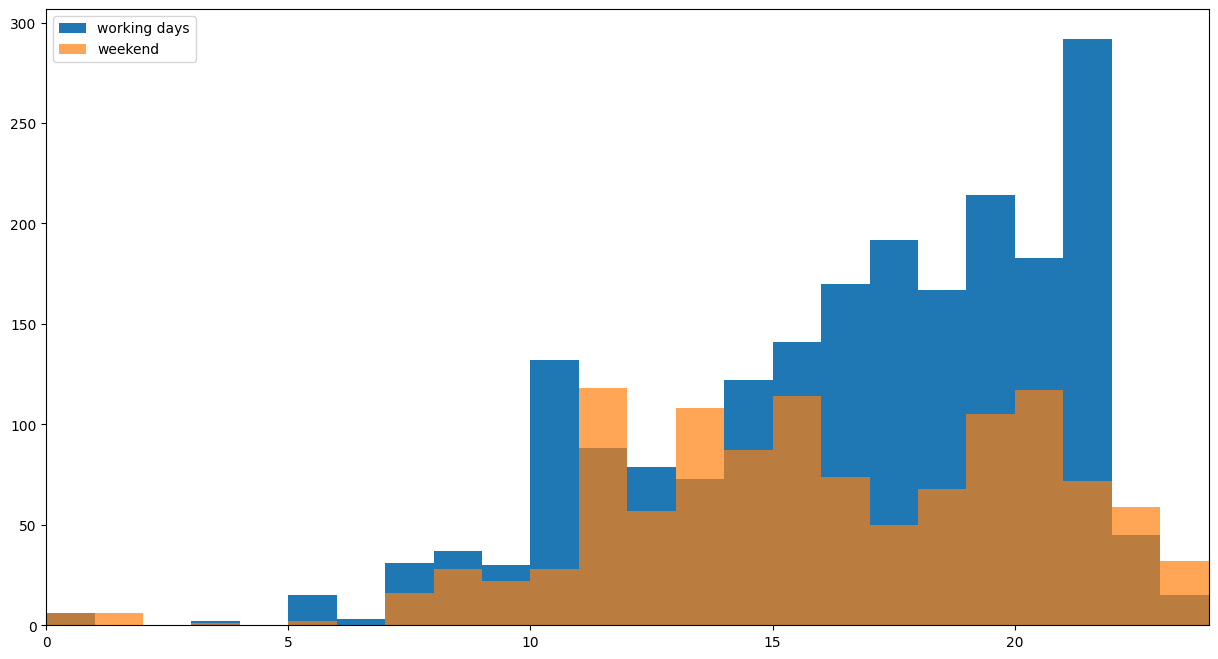

In [157]:
plt.figure(figsize=(15,8))
plt.hist(x=data[0], bins=range(0, 25), range=[0, 24])
plt.hist(x=data[1], bins=range(0, 25), range=[0, 24], alpha=0.7)
plt.legend(['working days', 'weekend'])
plt.xlim(0, 24)
plt.plot()

## Close connection

In [158]:
con.close()

## Are there hours when the total number of commits was higher on weekends than on working days?

Yes, at 11, 13, 22 and 23 hours.